ε-greedy (ε = 0.1, init = 0) took 11.53 seconds.
ε-greedy (ε = 0.01, init = 0) took 11.19 seconds.
Greedy (ε = 0, init = 0) took 10.08 seconds.
Greedy (ε = 0, init = 40) took 9.77 seconds.


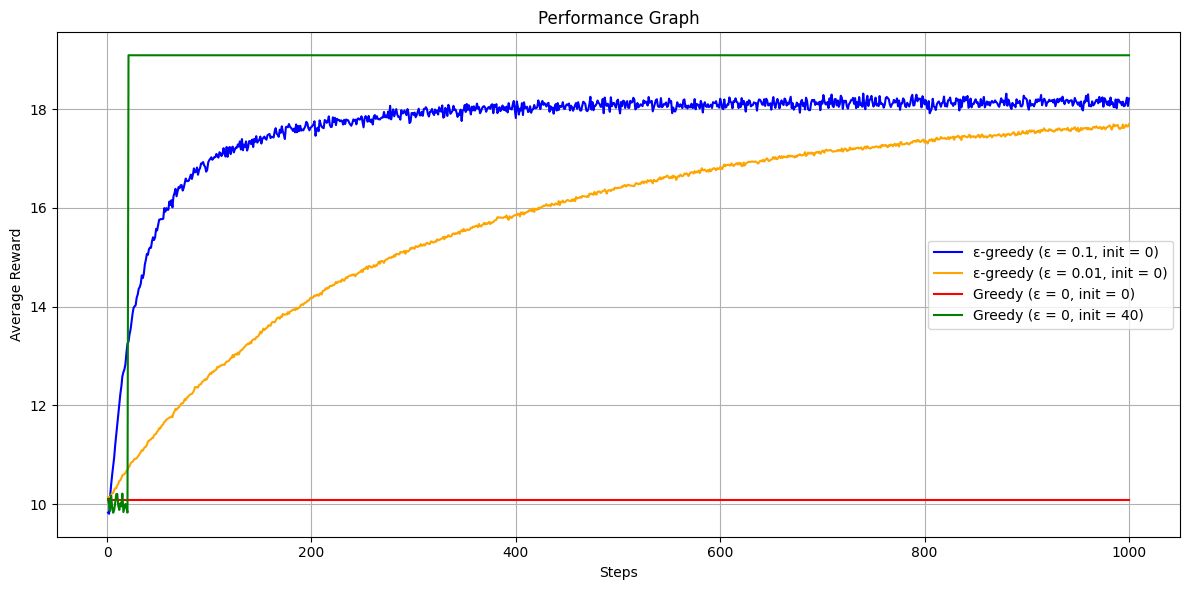

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import time
class twentyarmedbandit:
    def __init__(self, n_arms=20, init_value=0):
        self.n_arms = n_arms
        self.truevalues = np.random.uniform(0, 20, n_arms)
        self.estimates = np.ones(n_arms) * init_value
        self.actioncounts = np.zeros(n_arms)
    def pullarm(self, arm):
        return self.truevalues[arm]
    def updtestimates(self, arm, reward):
        self.actioncounts[arm] += 1
        self.estimates[arm] += (reward - self.estimates[arm]) / self.actioncounts[arm]
def selectaction(estimates, epsilon):
    if np.random.random() < epsilon:
        return np.random.randint(len(estimates))
    else:
        return np.argmax(estimates)
def runningexperiment(n_bandits=2000, n_steps=1000, n_arms=20, epsilon=0, init_value=0):
    start_time = time.time()
    rewards = np.zeros((n_bandits, n_steps))
    for bandit_idx in range(n_bandits):
        bandit = twentyarmedbandit(n_arms, init_value)
        for step in range(n_steps):
            arm = selectaction(bandit.estimates, epsilon)
            reward = bandit.pullarm(arm)
            bandit.updtestimates(arm, reward)
            rewards[bandit_idx, step] = reward
    end_time = time.time()
    runtime = end_time - start_time
    return rewards.mean(axis=0), runtime
def plottingresults():
    n_steps = 1000
    steps = np.arange(1, n_steps + 1)
    configs = [
        {"epsilon": 0.1, "init": 0, "label": "ε-greedy (ε = 0.1, init = 0)", "color": "blue"},
        {"epsilon": 0.01, "init": 0, "label": "ε-greedy (ε = 0.01, init = 0)", "color": "orange"},
        {"epsilon": 0.0, "init": 0, "label": "Greedy (ε = 0, init = 0)", "color": "red"},
        {"epsilon": 0.0, "init": 40, "label": "Greedy (ε = 0, init = 40)", "color": "green"}]
    plt.figure(figsize=(12, 6))
    for config in configs:
        avg_rewards, runtime = runningexperiment(
            n_bandits=2000,
            n_steps=n_steps,
            n_arms=20,
            epsilon=config["epsilon"],
            init_value=config["init"])
        print(f"{config['label']} took {runtime:.2f} seconds.")
        plt.plot(steps, avg_rewards, label=config["label"], color=config["color"])
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.title("Performance Graph")
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()
if __name__ == "__main__":
    plottingresults()